Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.1876 - loss: 1.9373 - val_accuracy: 0.2000 - val_loss: 1.9613
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2059 - loss: 1.9160 - val_accuracy: 0.2000 - val_loss: 1.9791
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1909 - loss: 1.9051 - val_accuracy: 0.1500 - val_loss: 2.0098
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2316 - loss: 1.8993 - val_accuracy: 0.2000 - val_loss: 2.0439
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1814 - loss: 1.9239 - val_accuracy: 0.2000 - val_loss: 2.0804
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2463 - loss: 1.8916 - val_accuracy: 0.2000 - val_loss: 2.0881
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2133 - loss: 1.9155 - val_accuracy: 0.2000 - val_loss: 2.0940
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1988 - loss: 1.8597 - val_accuracy: 0.2000 - val_loss: 2.0967

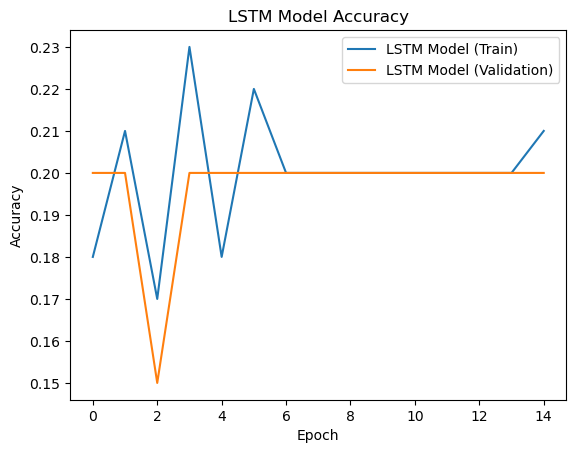

In [5]:
import numpy as np
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define your function to load and preprocess time-series data
def load_time_series_data():
    # Example: Load and preprocess your time-series data (replace with your implementation)
    time_series_data = np.random.rand(100, 10, 3)  # Example time-series data (100 samples, 10 time steps, 3 features)
    train_labels = np.random.randint(0, 7, size=(100,))  # Example labels (assuming 7 classes)
    validation_time_series_data = np.random.rand(20, 10, 3)  # Example validation time-series data
    validation_labels = np.random.randint(0, 7, size=(20,))  # Example validation labels

    return time_series_data, train_labels, validation_time_series_data, validation_labels

# Load and preprocess time-series data
time_series_data, train_labels, validation_time_series_data, validation_labels = load_time_series_data()

# Check if time_series_data is not None
if time_series_data is not None:
    # Define input shape based on the loaded time-series data
    input_shape_time_series = (time_series_data.shape[1], time_series_data.shape[2])

    # Create LSTM model
    inputs = Input(shape=input_shape_time_series)
    x = LSTM(128)(inputs)
    x = Dropout(0.25)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(7, activation='softmax')(x)  # Assuming 7 classes
    lstm_model = Model(inputs=inputs, outputs=outputs)

    # Compile LSTM model
    lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the LSTM model
    history_lstm = lstm_model.fit(
        x=time_series_data,
        y=train_labels,
        epochs=15,
        validation_data=(validation_time_series_data, validation_labels)
    )

    # Evaluate the LSTM model
    lstm_model.evaluate(validation_time_series_data, validation_labels)

    # Plot LSTM model performance
    plt.plot(history_lstm.history['accuracy'], label='LSTM Model (Train)')
    plt.plot(history_lstm.history['val_accuracy'], label='LSTM Model (Validation)')
    plt.title('LSTM Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
else:
    print("Error: Failed to load valid time-series data.")
